## Exercício 3
### Aluno: Fábio Calça Carvalho
### NUSP: 11804716

Implementar uma rede neural e utilizar o treinamento com o algoritmo de retropropagação para modelar as seguintes funções:

1. $ f(x) = \frac{1}{x}, 1 \leq x \leq 100 $

2. $ f(x) = log_{10}x, 1 \leq x \leq 10 $

3. $ f(x) = exp(-x), 1 \leq x \leq 10 $

4. $ f(x) = sen(x), 0 \leq x \leq \frac{pi}{2} $

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Funções auxiliares

In [2]:
# Função de ativação sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivada da função sigmoide
def sigmoid_d(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Função que inicializa os pesos com valores aleatórios
def initialize_weights(n_input, n_hidden, n_output):
    W1 = np.random.randn(n_hidden, n_input) * np.sqrt(1. / n_input)
    b1 = np.zeros((n_hidden, 1))
    W2 = np.random.randn(n_output, n_hidden) * np.sqrt(1. / n_hidden)
    b2 = np.zeros((n_output, 1))
    return W1, b1, W2, b2

# Passo de forward
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2

# Função de custo
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = np.sum((A2 - Y) ** 2) / m
    return cost

# Passo de backward
def backward_pass(X, Y, Z1, A1, Z2, A2, W1, W2):
    m = Y.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_d(Z1)
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
    return dW1, db1, dW2, db2

# Função para atualizar parâmetros
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    # W(n) = W(n-1) - eta*dJ/W 
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


### Função de treinamento

In [3]:
def train_neural_network(X, Y, n_hidden, learning_rate, epochs):
    n_input = X.shape[0]
    n_output = Y.shape[0]
    W1, b1, W2, b2 = initialize_weights(n_input, n_hidden, n_output)
    cost_history = []

    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_pass(X, W1, b1, W2, b2)
        cost = compute_cost(A2, Y)
        cost_history.append(cost)
        dW1, db1, dW2, db2 = backward_pass(X, Y, Z1, A1, Z2, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    return W1, b1, W2, b2, cost_history


### Função de inferência

In [4]:
def infer(W1, b1, W2, b2, X, n_hidden):
    _, _, _, A2 = forward_pass(X, W1, b1, W2, b2)
    return A2

### Gerando os dados de treino e teste

In [5]:
def generate_train_test_data(func, x_range, num_points=10000, test_size=1000):
    # Gerar x dados uniformemente espaçados dentro do intervalo especificado
    x_values = np.linspace(x_range[0], x_range[1], num_points)
    
    # Calcular y usando a função especificada
    y_values = func(x_values)
    
    # Selecionar índices aleatórios para o conjunto de teste
    test_indices = np.random.choice(num_points, test_size, replace=False)
    
    # Índices de treino = diferença entre o set completo e o set de teste
    train_indices = np.setdiff1d(np.arange(num_points), test_indices)
    
    # Dividir os dados em treinamento e teste
    x_train = x_values[train_indices].reshape(1, -1)
    y_train = y_values[train_indices].reshape(1, -1)
    x_test = x_values[test_indices].reshape(1, -1)
    y_test = y_values[test_indices].reshape(1, -1)
    
    return x_train, y_train, x_test, y_test

# Ordenar os dados para o plot
def sort_by_x(x, y):
    # Obter os índices que ordenariam o vetor x
    sorted_indices = np.argsort(x.flatten())
    
    # Usar os índices para ordenar x e y
    x_sorted = x.flatten()[sorted_indices]
    y_sorted = y.flatten()[sorted_indices]
    
    return x_sorted, y_sorted

### Treinando as funções f(x)

#### Função 1: $f(x) = \frac{1}{x}, 1 \leq x \leq 100 $

MSE para 3 camadas ocultas: 0.006212495478283447
MSE para 4 camadas ocultas: 0.006360204835963473
MSE para 5 camadas ocultas: 0.006367683591392466
MSE para 10 camadas ocultas: 0.005153178445743475
MSE para 15 camadas ocultas: 0.004356396281216396
MSE para 20 camadas ocultas: 0.002174586399417291
MSE para 50 camadas ocultas: 0.0010861771726499857
MSE para 100 camadas ocultas: 0.0005365414297882223


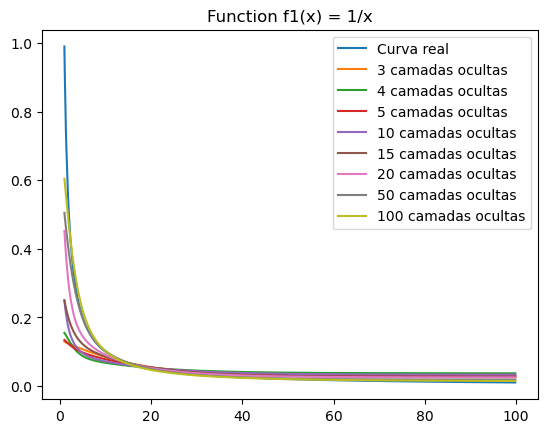

In [6]:
# Parâmetros de treinamento
n_hidden = [3, 4, 5, 10, 15, 20, 50, 100]
learning_rate = 0.01
epochs = 10000


# Gerar dados de treinamento e teste para f1(x)
f1 = lambda x: 1/x
x_train_f1, y_train_f1, x_test_f1, y_test_f1 = generate_train_test_data(f1, (1, 100))

# Plotando resultados para f1(x)
x, y = sort_by_x(x_test_f1.flatten(), y_test_f1.flatten())
plt.plot(x, y, label='Curva real')
plt.title('Function f1(x) = 1/x')

# Treinando a rede para f1(x)
for i in range(len(n_hidden)):
    W1_f1, b1_f1, W2_f1, b2_f1, cost_history_f1 = train_neural_network(x_train_f1, y_train_f1, n_hidden[i], learning_rate, epochs)
    y_pred_f1 = infer(W1_f1, b1_f1, W2_f1, b2_f1, x_test_f1, n_hidden[i])
    mse_f1 = np.mean((y_pred_f1 - y_test_f1) ** 2)
    print(f"MSE para {n_hidden[i]} camadas ocultas: {mse_f1}")
    x, y = sort_by_x(x_test_f1.flatten(), y_pred_f1.flatten())
    plt.plot(x, y, label=f"{n_hidden[i]} camadas ocultas")
plt.legend()


#### Função 2: $f(x) = \log_{10} x, 1 \leq x \leq 10 $

MSE para 3 camadas ocultas: 0.007035317897689278
MSE para 4 camadas ocultas: 0.003631914508015461
MSE para 5 camadas ocultas: 0.002632740514494482
MSE para 10 camadas ocultas: 0.0019375351033278456
MSE para 15 camadas ocultas: 0.0014616591886741856
MSE para 20 camadas ocultas: 0.0013611337611189164
MSE para 50 camadas ocultas: 0.0012435345479135716
MSE para 100 camadas ocultas: 0.0014447557481550328


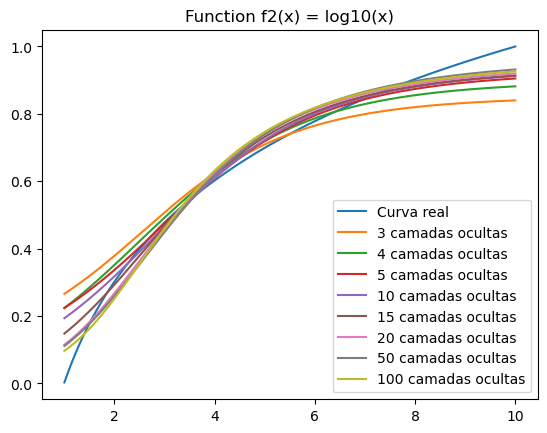

In [7]:
# Gerar dados de treinamento e teste para f2(x)
f2 = lambda x: np.log10(x)
x_train_f2, y_train_f2, x_test_f2, y_test_f2 = generate_train_test_data(f2, (1, 10))

# Plotando resultados para f2(x)
x, y = sort_by_x(x_test_f2.flatten(), y_test_f2.flatten())
plt.plot(x, y, label='Curva real')
plt.title('Function f2(x) = log10(x)')

# Treinando a rede para f2(x)
for i in range(len(n_hidden)):
    W1_f2, b1_f2, W2_f2, b2_f2, cost_history_f2 = train_neural_network(x_train_f2, y_train_f2, n_hidden[i], learning_rate, epochs)
    y_pred_f2 = infer(W1_f2, b1_f2, W2_f2, b2_f2, x_test_f2, n_hidden[i])
    mse_f2 = np.mean((y_pred_f2 - y_test_f2) ** 2)
    print(f"MSE para {n_hidden[i]} camadas ocultas: {mse_f2}")
    x, y = sort_by_x(x_test_f2.flatten(), y_pred_f2.flatten())
    plt.plot(x, y, label=f"{n_hidden[i]} camadas ocultas")
plt.legend()

#### Função 3: $f(x) = exp(-x), 1 \leq x \leq 10 $

MSE para 3 camadas ocultas: 0.003936214549744878
MSE para 4 camadas ocultas: 0.0035463864946687763
MSE para 5 camadas ocultas: 0.0034038844086664403
MSE para 10 camadas ocultas: 0.0018817503161045568
MSE para 15 camadas ocultas: 0.0016953189974305025
MSE para 20 camadas ocultas: 0.0015115315154169955
MSE para 50 camadas ocultas: 0.000437615415122662
MSE para 100 camadas ocultas: 6.999104905533927e-05


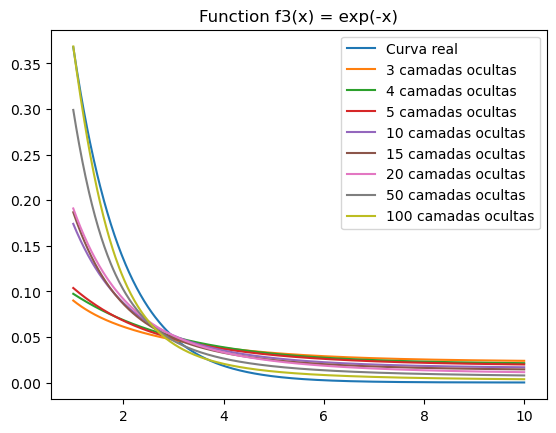

In [8]:
# Gerar dados de treinamento e teste para f3(x)
f3 = lambda x: np.exp(-x)
x_train_f3, y_train_f3, x_test_f3, y_test_f3 = generate_train_test_data(f3, (1, 10))

# Plotando resultados para f3(x)
x, y = sort_by_x(x_test_f3.flatten(), y_test_f3.flatten())
plt.plot(x, y, label='Curva real')
plt.title('Function f3(x) = exp(-x)')

# Treinando a rede para f3(x)
for i in range(len(n_hidden)):
    W1_f3, b1_f3, W2_f3, b2_f3, cost_history_f3 = train_neural_network(x_train_f3, y_train_f3, n_hidden[i], learning_rate, epochs)
    y_pred_f3 = infer(W1_f3, b1_f3, W2_f3, b2_f3, x_test_f3, n_hidden[i])
    mse_f3 = np.mean((y_pred_f3 - y_test_f3) ** 2)
    print(f"MSE para {n_hidden[i]} camadas ocultas: {mse_f3}")
    x, y = sort_by_x(x_test_f3.flatten(), y_pred_f3.flatten())
    plt.plot(x, y, label=f"{n_hidden[i]} camadas ocultas")
plt.legend()

#### Função 4: $f(x) = sen(x), 0 \leq x \leq \frac{\pi}{2} $

MSE para 3 camadas ocultas: 0.0029567788550022454
MSE para 4 camadas ocultas: 0.0015501521709406596
MSE para 5 camadas ocultas: 0.015606823559385396
MSE para 10 camadas ocultas: 0.0013136216236756312
MSE para 15 camadas ocultas: 0.0009322208434223793
MSE para 20 camadas ocultas: 0.000874858269720393
MSE para 50 camadas ocultas: 0.0008653223082095908
MSE para 100 camadas ocultas: 0.0009386256199453124


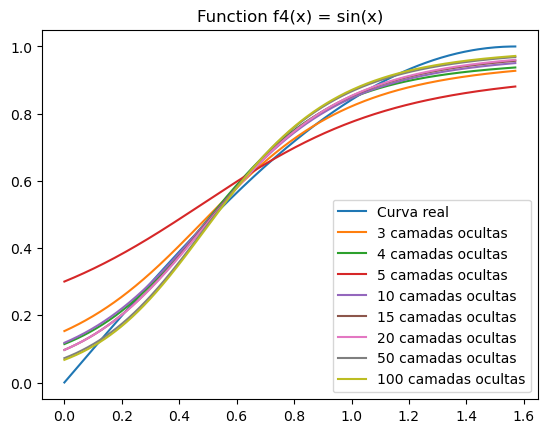

In [9]:
# Gerar dados de treinamento e teste para f4(x)
f4 = lambda x: np.sin(x)
x_train_f4, y_train_f4, x_test_f4, y_test_f4 = generate_train_test_data(f4, (0, np.pi/2))

# Plotando resultados para f4(x)
x, y = sort_by_x(x_test_f4.flatten(), y_test_f4.flatten())
plt.plot(x, y, label='Curva real')
plt.title('Function f4(x) = sin(x)')

# Treinando a rede para f4(x)
for i in range(len(n_hidden)):
    W1_f4, b1_f4, W2_f4, b2_f4, cost_history_f4 = train_neural_network(x_train_f4, y_train_f4, n_hidden[i], learning_rate, epochs)
    y_pred_f4 = infer(W1_f4, b1_f4, W2_f4, b2_f4, x_test_f4, n_hidden[i])
    mse_f4 = np.mean((y_pred_f4 - y_test_f4) ** 2)
    print(f"MSE para {n_hidden[i]} camadas ocultas: {mse_f4}")
    x, y = sort_by_x(x_test_f4.flatten(), y_pred_f4.flatten())
    plt.plot(x, y, label=f"{n_hidden[i]} camadas ocultas")
plt.legend()

| Número de camadas ocultas | $f_1(x)$ | $f_2(x)$ | $f_3(x)$ | $f_4(x)$ |
|----------|----------|----------|----------|----------|
| 3 | 0.006212495478283447 | 0.007035317897689278| 0.003936214549744878| 0.0029567788550022454 |
| 4 | 0.006360204835963473|0.003631914508015461| 0.0035463864946687763| 0.0015501521709406596|
| 5 | 0.006367683591392466|0.002632740514494482 | 0.0034038844086664403| 0.015606823559385396|
| 10 | 0.005153178445743475| 0.0019375351033278456|  0.0018817503161045568| 0.0013136216236756312|
| 15 | 0.004356396281216396| 0.0014616591886741856|  0.0016953189974305025| 0.0009322208434223793|
| 20 |  0.002174586399417291|0.0013611337611189164| 0.0015115315154169955| 0.000874858269720393|
| 50 | 0.0010861771726499857| 0.0012435345479135716| 0.000437615415122662| 0.0008653223082095908|
| 100 | 0.0005365414297882223|0.0014447557481550328|  6.999104905533927e-05| 0.0009386256199453124|
